## 라이브러리 가져오기
-----

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


## pandas로 데이터셋 가져오기
-----

In [2]:
import os
csv_path = 'archive/Pokemon.csv'
original_data = pd.read_csv(csv_path)

### ```original_data```는 그대로 두고 복사해서 사용하자.
앞으로 데이터셋에 다양한 작업을 하게 되므로, 원본을 유지하는 것이 도움이 된다.


In [3]:
pokemon = original_data.copy()
print(pokemon.shape) # 데이터셋의 크기 출력
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Legendary 컬럼 값을 기준으로 데이터셋 나누기

In [11]:
# 전설의 포켓몬 데이터 셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop = True) 
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


[```Pandas.DataFrame.reset_index``` 문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)  
### 800개의 데이터중 총 65개만 전설의 포켓몬!!

In [13]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 빈데이터 확인하기
-----

In [14]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## 전체 컬럼 이해하기
-----

800행 13열이면 데이터셋이 크지 않다 

### -> 모든 데이터들을 하나하나 이해해볼 수 있따 

In [15]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

* **# :** 포켓몬 Id number. 같은 포켓몬이지만 성별이 다른 경우 등은 같은 #값을 가진다. ```int```
* **Name :** 포켓몬 이름. 포켓몬 각각의 이름으로, 이름 데이터는 800개의 포켓몬이 모두 다르다. (unique) ```str```
* **Type 1 :** 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. ```str```
* **Type 2 :** 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. ```str```
* **Total :** 전체 6가지 스탯의 총합. ```int```
* **HP :** 포켓몬의 체력. ```int```
* **Attack :** 물리 공격력. (scratch, punch 등) ```int```
* **Defense :** 물리 공격에 대한 방어력. ```int```
* **Sp. Atk :** 특수 공격력. (fire blast, bubble beam 등) ```int```
* **Sp. Def :** 특수 공격에 대한 방어력. ```int```
* **Speed :** 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) ```int```
* **Generation :** 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. ```int```
* **Legendary :** 전설의 포켓몬 여부. **!! Target feature !!** ```bool```

## #: ID number
-----

In [16]:
# #컬럼의 값 종류 
len(set(pokemon["#"]))

721

전체 데이터가 800개인데 set에 넣어 중복제거 해보니 712개.
### 컬럼의 값이 unique 하지 않다 = 인덱스로 쓸 수 없다!

In [17]:
pokemon[pokemon['#'] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


기본 포켓몬인 ```Charizard``` - 진화 -> ```CharizardMega Charizard X or Y``` (X,Y는 성별인듯)

## Name: 이름
-----

In [21]:
len(set(pokemon["Name"]))

800

### 전체 데이터셋 크기와 일치하므로 모든 값이 unique하다!

## Type 1 & Type 2: 포켓몬의 속성
-----

In [22]:
# 무작위로 포켓몬 2마리 선택
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


```Charizard```는 Fire와 Flying 속성   
```Wartortle```은 Warter 속성만 가진다

* 속성은 기본적으로 하나, 최대 2개까지 
* 속성이 하나 뿐이면 Type2에 NaN이 들어가있다.

In [23]:
# 속성의 종류
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

```Type 1```에 18가지, ```Type 2```에 19가지 속성 

In [24]:
# Type 2와 Type 1 차집합
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

```Type 2```의  NaN 데이터 외엔 모두 같은 셋의 데이터가 들어가있다!

In [25]:
# 포켓몬의 모든 타입 확인
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ground', 'Dark', 'Ice', 'Flying', 'Water', 'Electric', 'Bug', 'Fairy', 'Ghost', 'Poison', 'Psychic', 'Rock', 'Steel', 'Dragon', 'Fighting', 'Fire', 'Grass', 'Normal']


In [28]:
# 타입이 1개뿐인 포켓몬 수 구하기
pokemon["Type 2"].isna().sum()

386

[Pandas.DataFrame.isna() 문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

속성 1개: 386  
속성 2개: 414

## ```Type 1``` 데이터 분포 plot
-----

이 데이터는 일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 **불균형 데이터**

### 전설의 포켓몬은 따로 시각화 해주자

* ```plt.subplot```으로 두 개의 그래프 한번에 그리기 
* ```sns(seaborn))```의 ```countplot```(데이터 개수 표시)사용  

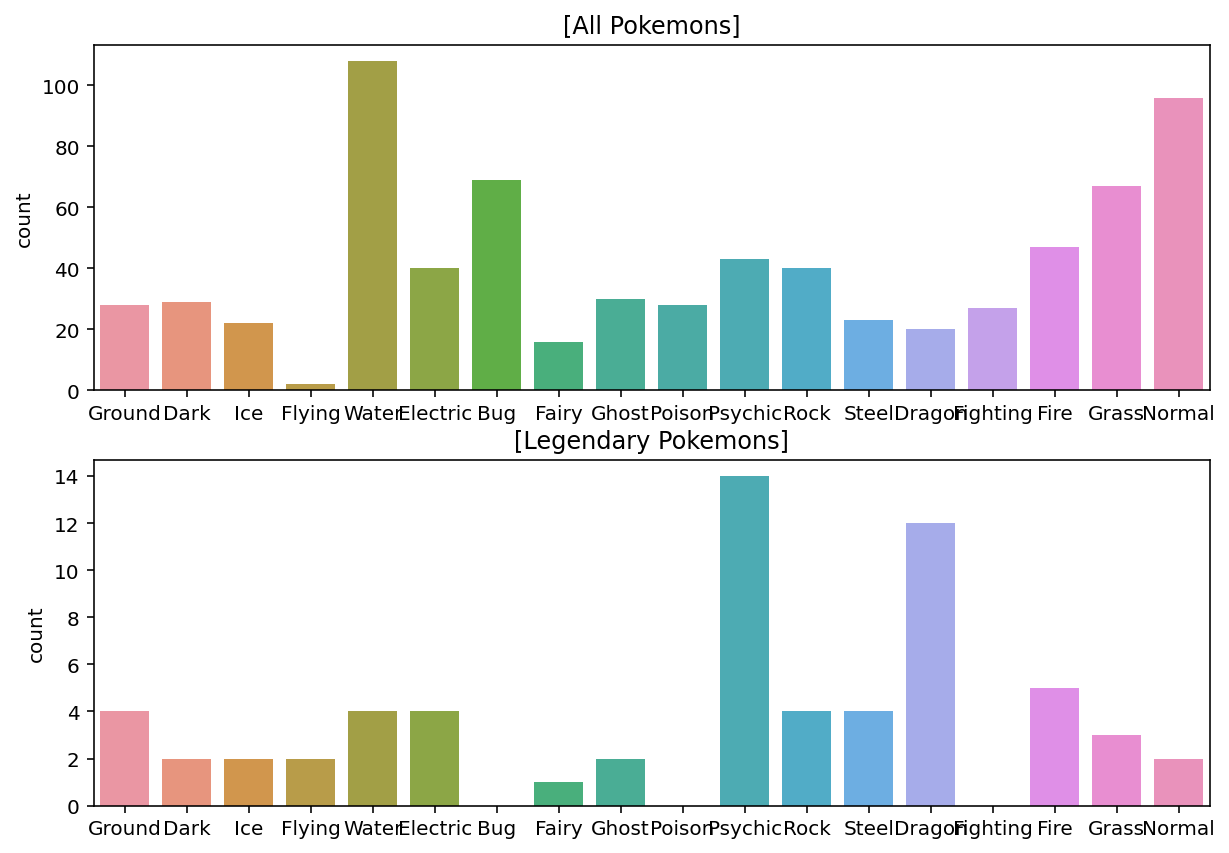

In [30]:
plt.figure(figsize=(10, 7)) # 화면 해상도에 따라 그래프 크기 조정

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반 포켓몬은 Warter, Nomal, Grass 속성이 각각 상위 1,2,3순위를 차지하지만,   
전설의 포켓몬은 Phychic, Dragon, Fire속성이 상위 1,2,3 순위를 차지한다. 

### pivot 테이블로 각 속성의 Legendary 포켓몬 퍼센테이지 확인

In [31]:
# Type 1별로 Legendary 비율 보여주는 피벗테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


### Flying 은 50%확률로 Legendary이다!

## Type 2 데이터 분포 plot
-----

Type 2는 결측값 NaN이 존재.
### ```Countplot```을 그릴 때 자동으로 제외됨!

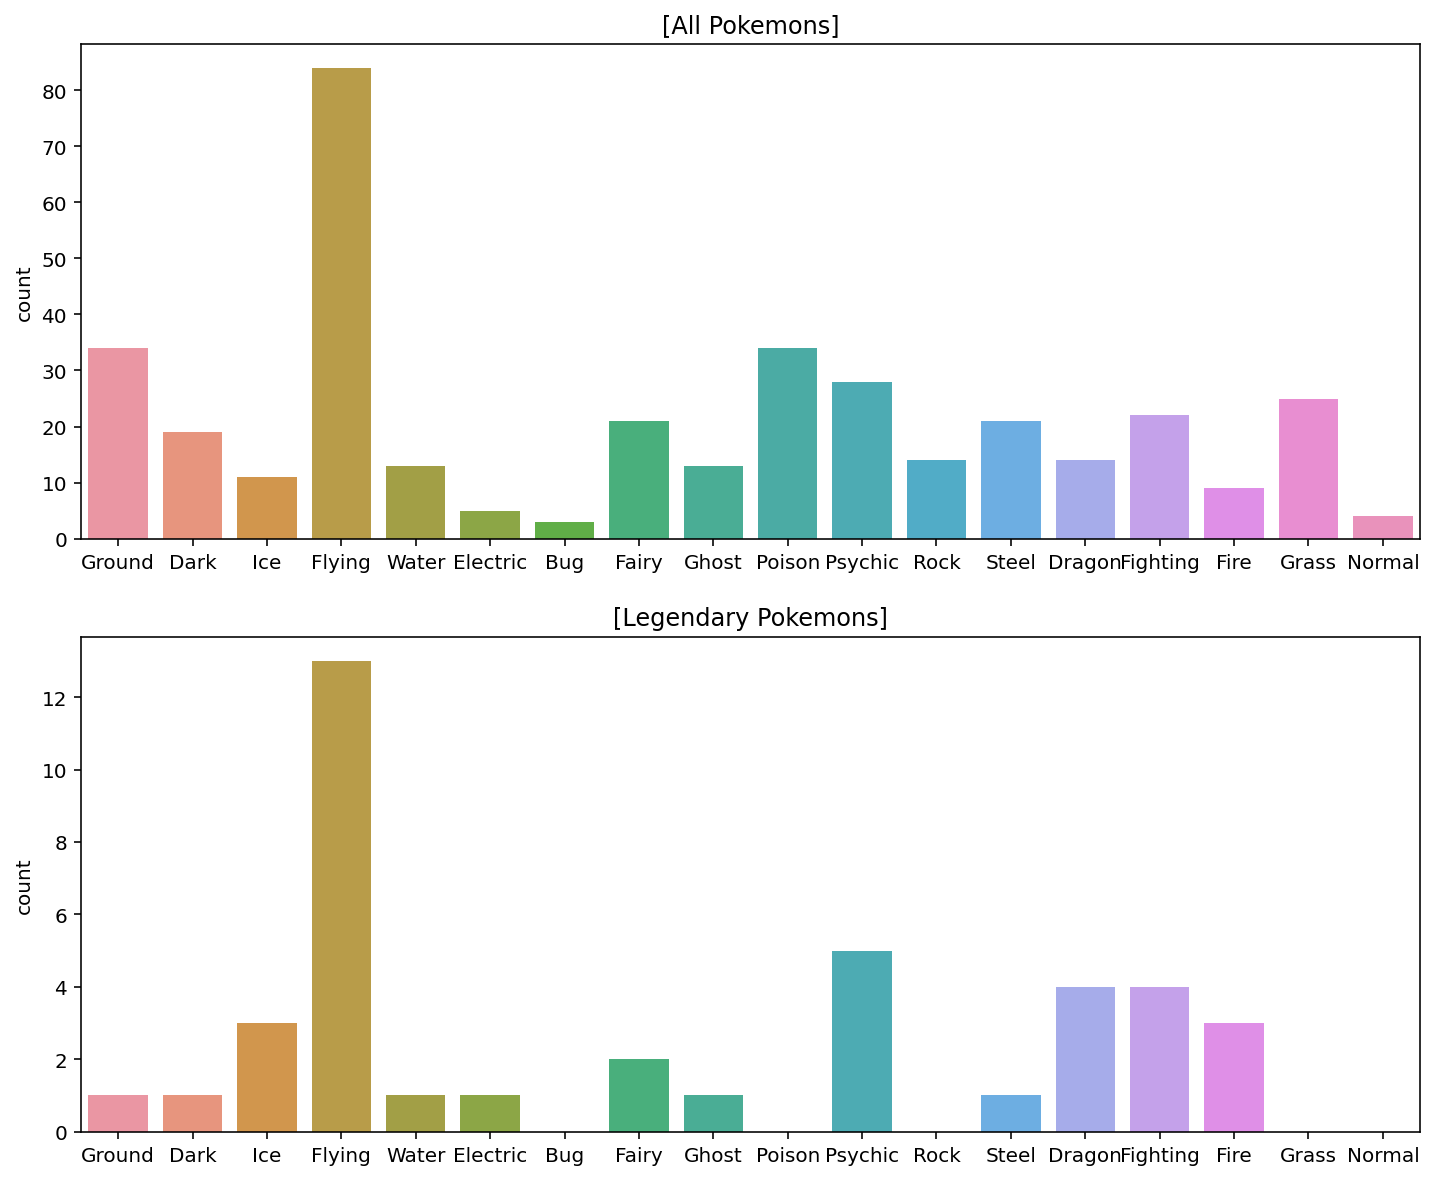

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Type 2 역시 일반과 전설 사이에 분포차이가 보인다.

* Flying 속성은 두 경우 모두에서 가장 많다.
* 일반포켓몬에서는 Grass, Rock, Poison 같은 속성이 많지만, 전설에는 하나도 없다. 
* 전설은 Dragon, Psychic, Fighting 같은 속성이 많다.

### Type 2 레전더리 비율 피벗테이블

In [36]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


### Type 2에서는 Fire 속성의 Legendary 비율이 25%로 가장 높다

## ```Total``` : 모든 스탯의 총합
-----

In [37]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

### 첫번째 포켓몬의 total과 스탯 총합 같은지 검증

In [52]:
print(f'#0 pokemon: {pokemon.loc[0, "Name"]}\n') # f'{Dataframe.loc[""]}' or f"Dataframe.loc['']}"
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


똑같다

### 전체 포켓몬의 totalrhk 스탯 총합 같은지 검증
[Pandas.DataFrame.sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [53]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

모두 똑같다
## ```Total```값에 따른 분포 plot
-----

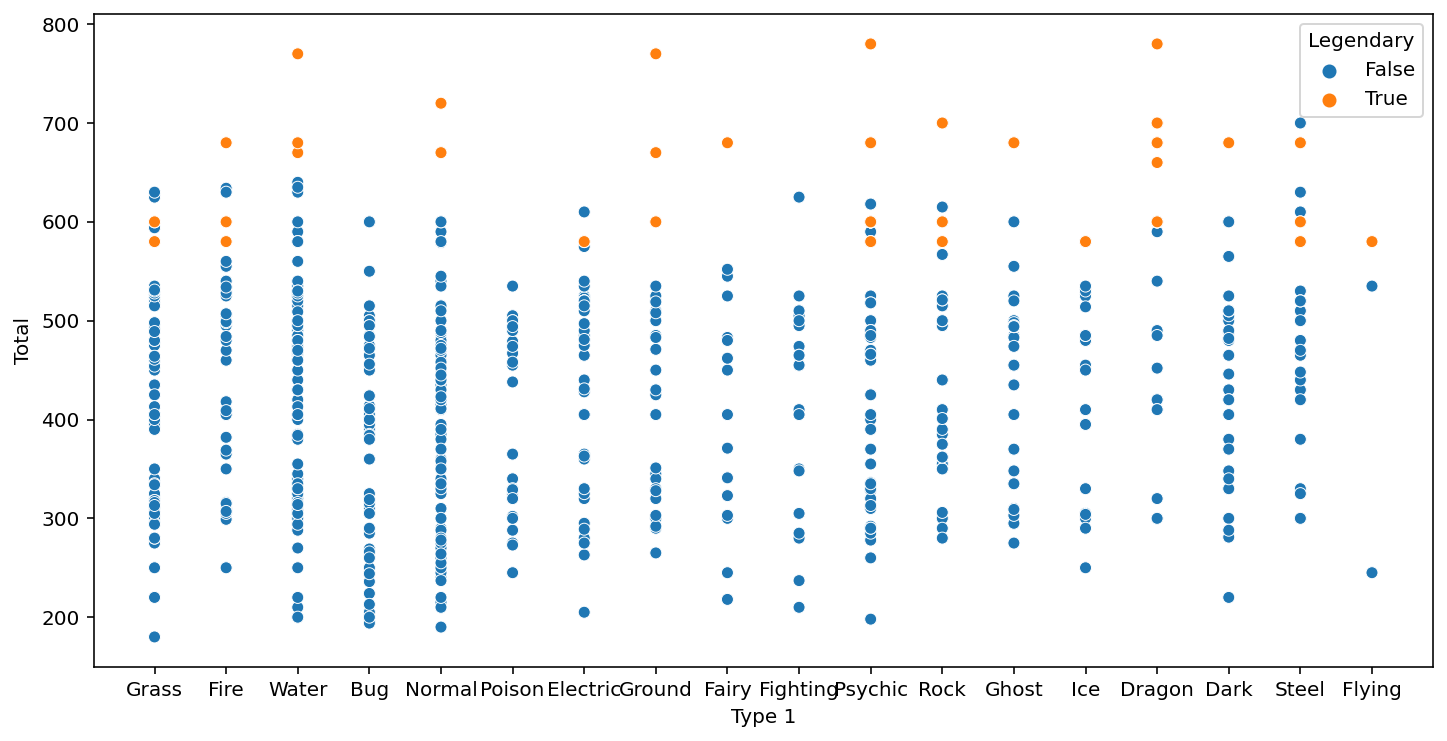

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

### 전설의 포켓몬들이 주로 ```Total```스탯값이 높다!

## 세부스탯
### HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

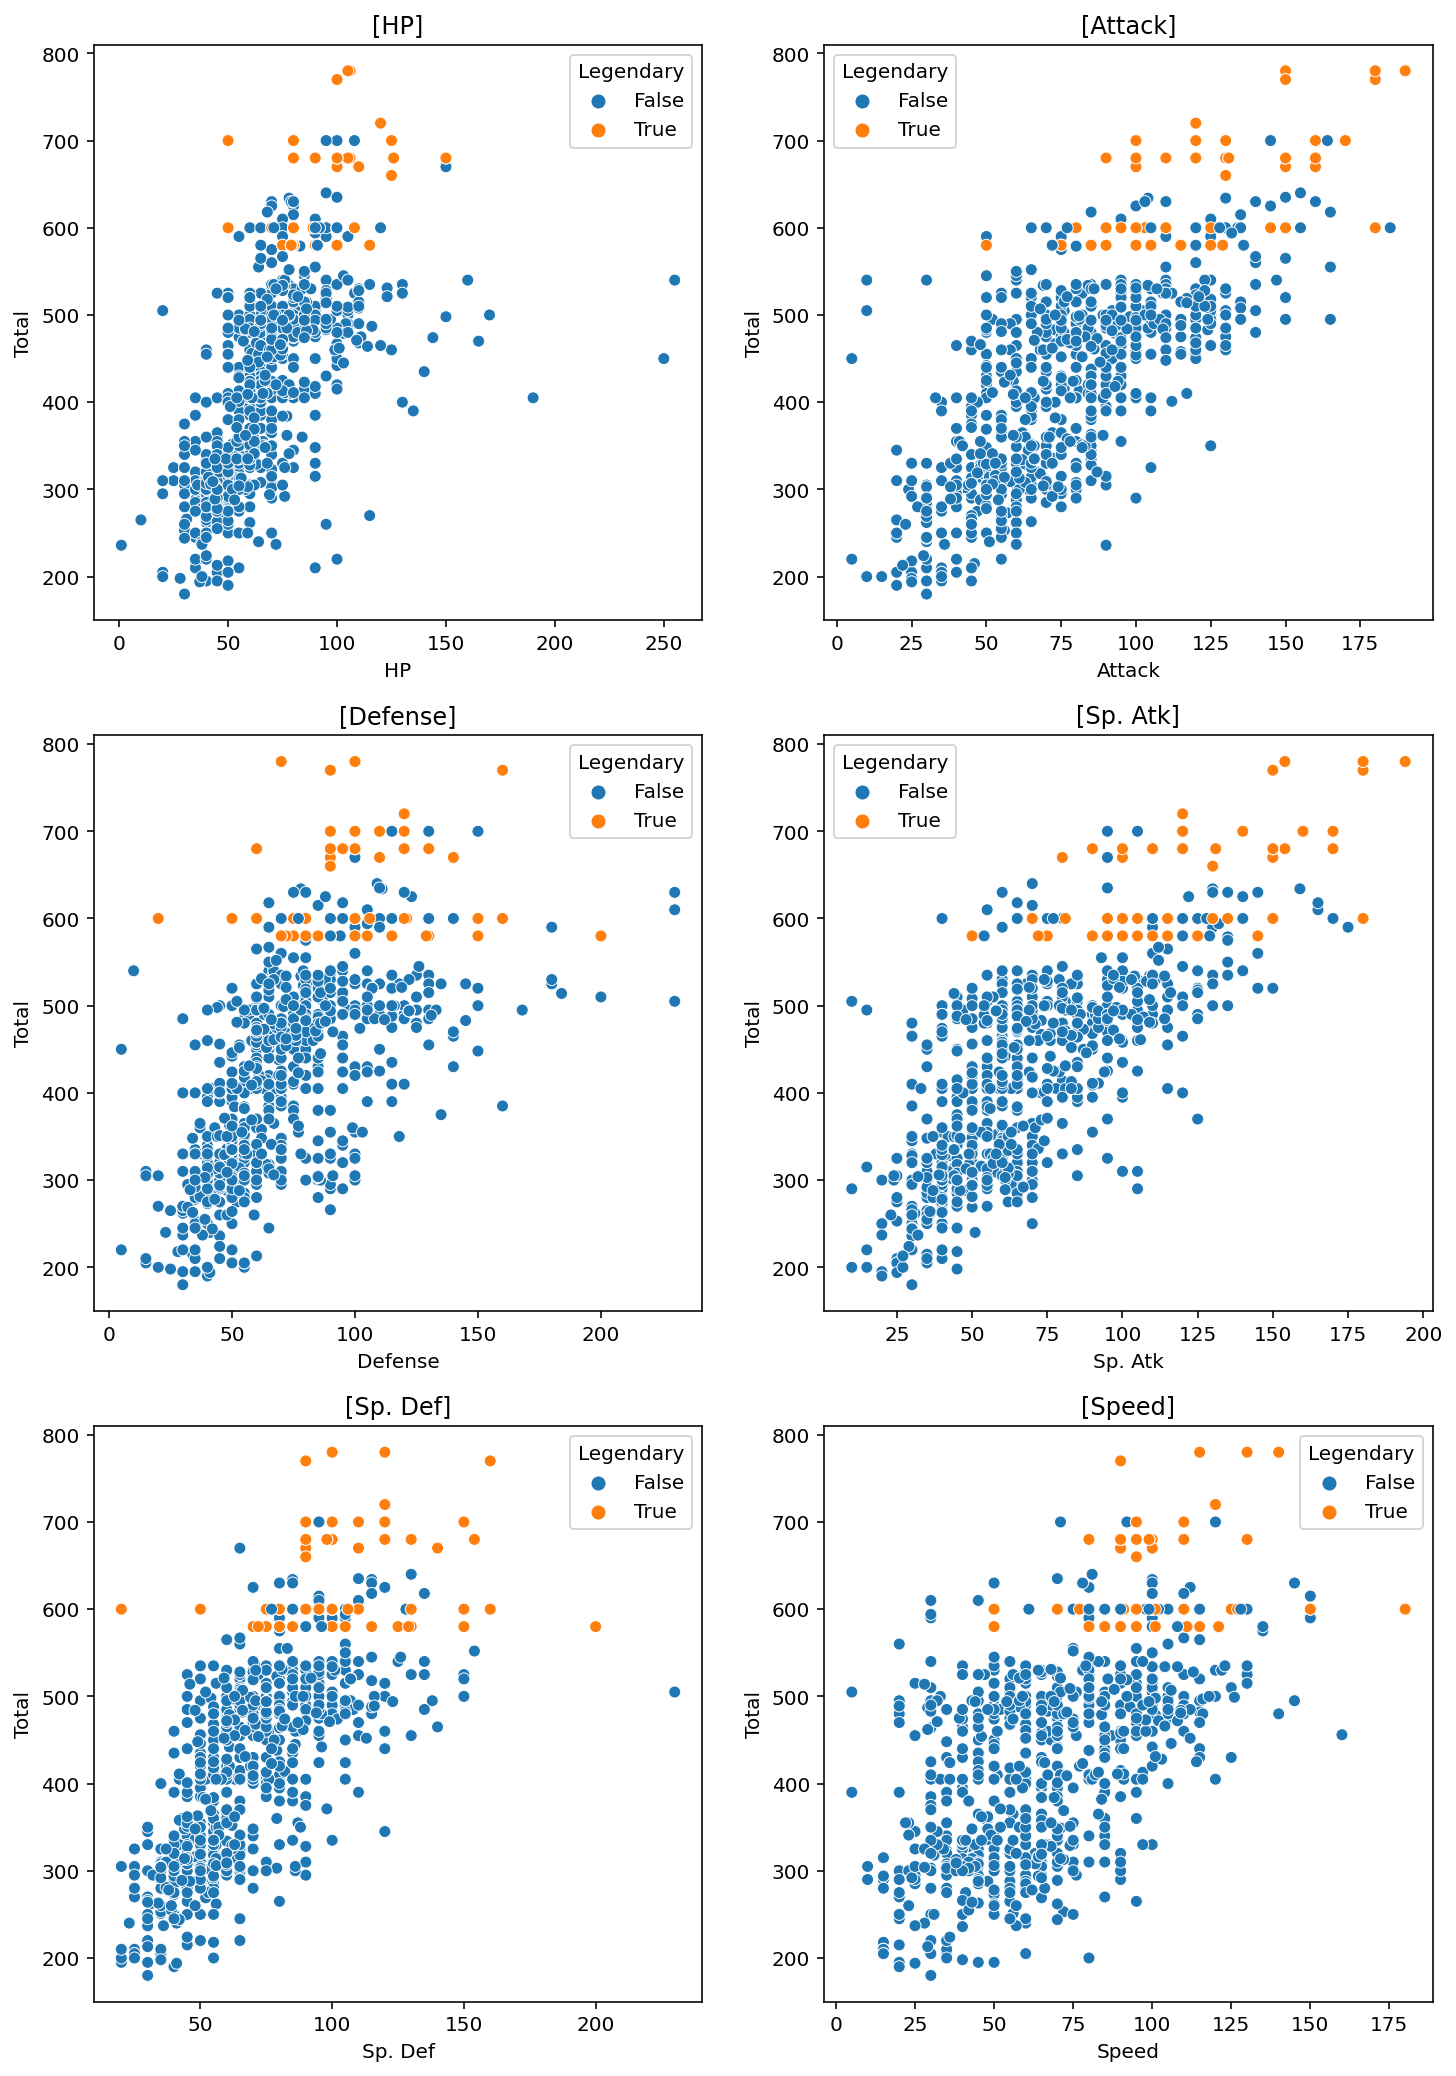

In [62]:
# subplot으로 각각의 스탯값 분포 한번에 확인
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

ax1.set_title("[HP]")
ax2.set_title("[Attack]")
ax3.set_title("[Defense]")
ax4.set_title("[Sp. Atk]")
ax5.set_title("[Sp. Def]")
ax6.set_title("[Speed]")

plt.show()

## 각 스탯에 대한 분석
-----
* ```HP```, ```Defense```, ```Sp. Def```   
   대부분 전설의 포켓몬이 높은 스탯을 갖지만
   일부 일반 포켓몬이 전설보다도 특히 높은 개체가 몇몇 있다.
   그러나 그 포켓몬들도 ```Total```값은 특별히 높지 않으므로
   특정 속성에만 특화된 포켓몬들로 보인다.
 
* ```Attack```, ```Sp. Atk```, ```Speed```
   ```Total```과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지함.

## ```Genaration``` : 포켓몬의 세대

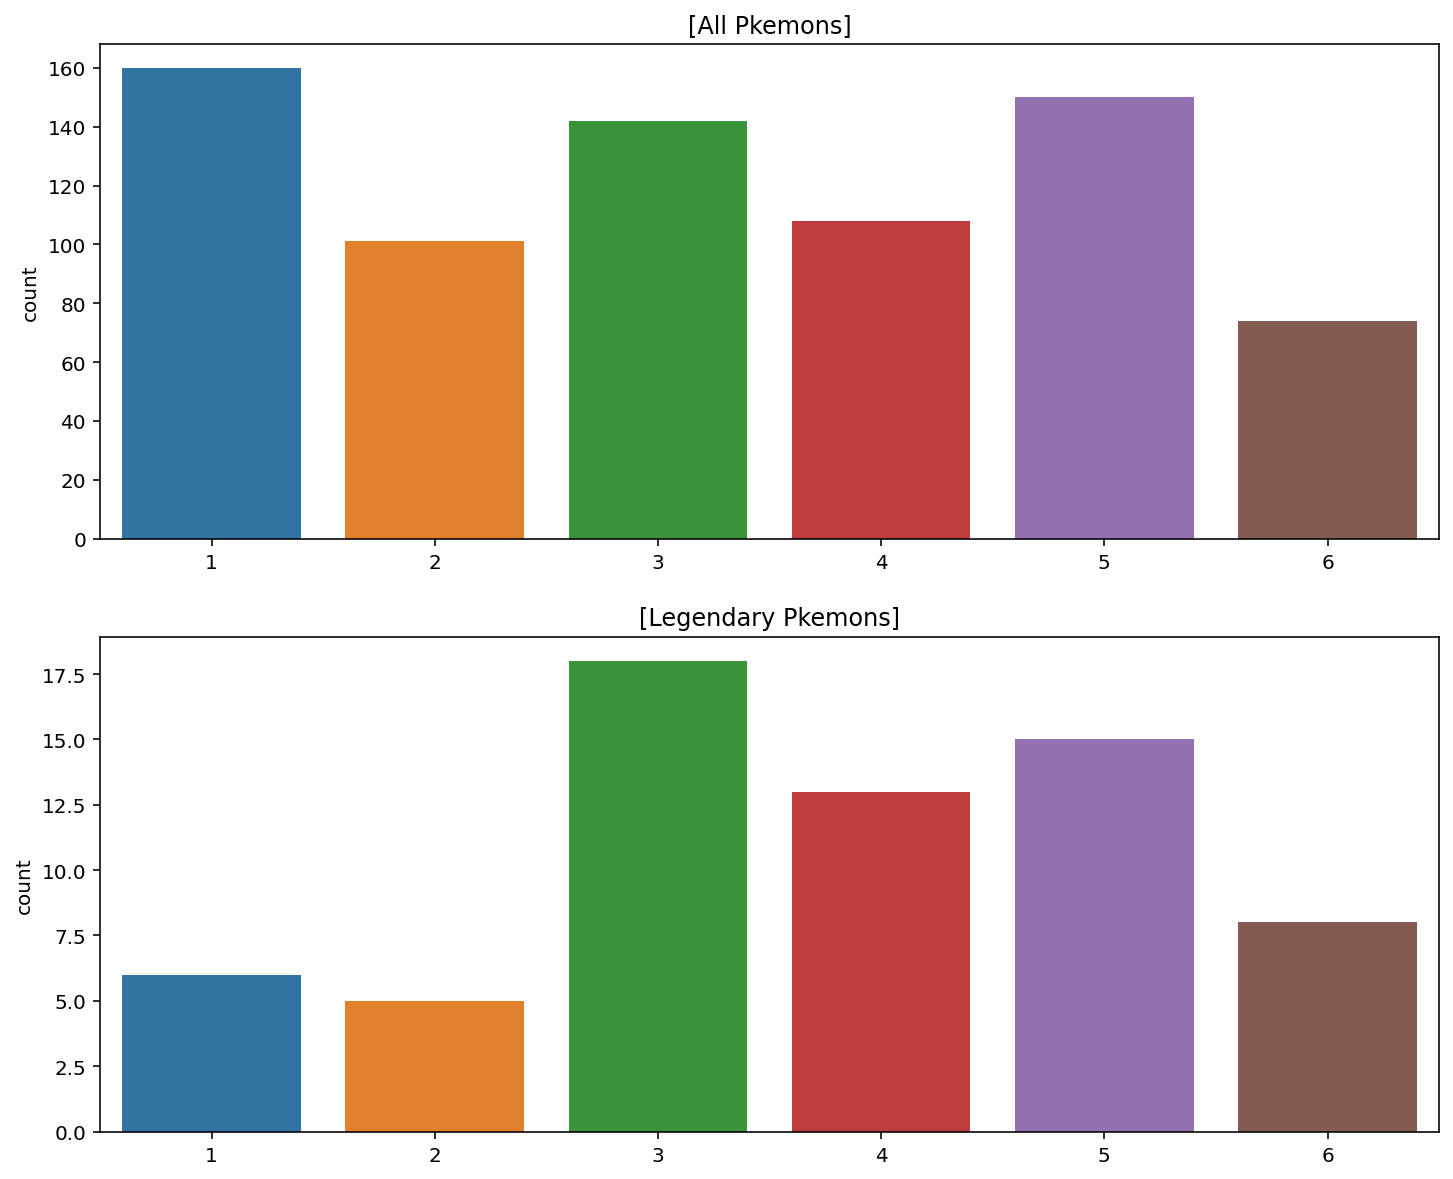

In [63]:
# 각 세대에 대한 포켓몬의 수 알아보기
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()


### 전설의 포켓몬은 1,2 세대에선 적었고, 3세대부터 많아졌다가 6세대에서 다시 줄어듬!

## 전설의 포켓몬의 ```Total```값
-----

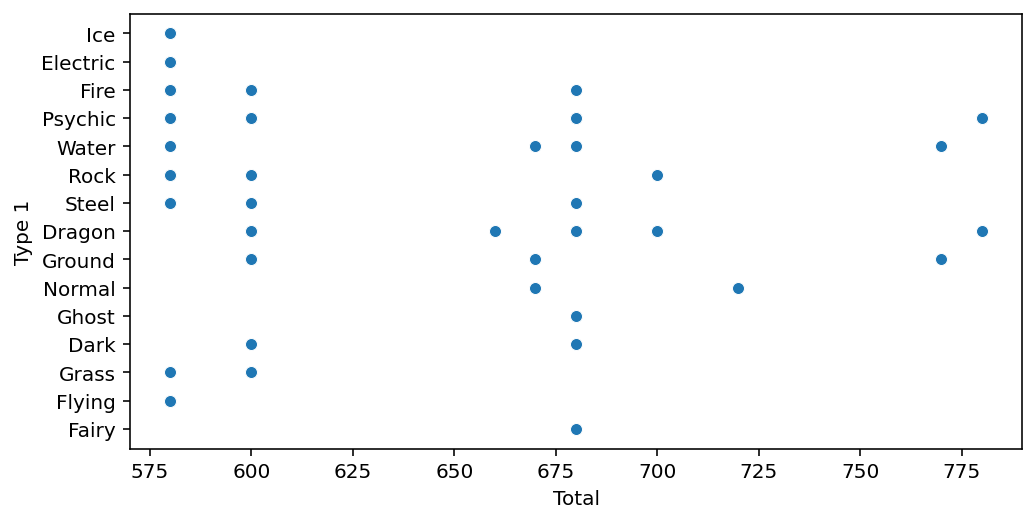

In [64]:
fig,ax = plt.subplots()
fig.set_size_inches(8,4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

### 전설의 포켓몬들의 ```Total```값들이 600등과 같은 특정점에 몰려있다!

In [65]:
sorted(list(set(legendary["Total"])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

### 실제로도 단 9개 밖에 존재하지 않는다

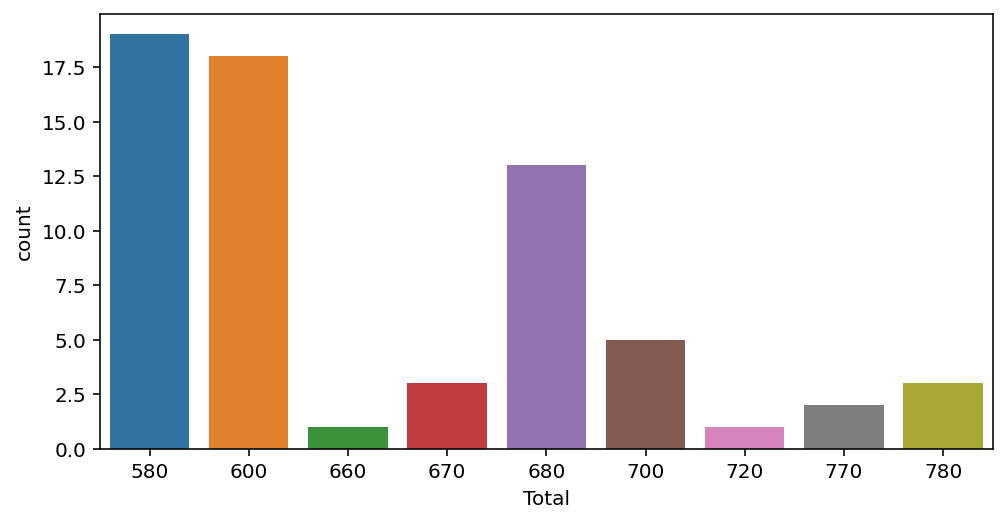

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

### 총 65마리의 전설의 포켓몬이 9개의 ```Total```값만 가진다.

In [67]:
round(65/ 9, 2)

7.22

### 약 7.22마리 끼리는 같은 ```Total```스탯 값을 가진다.

### 그렇다면 일반 포켓몬은??

In [68]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [69]:
len(sorted(list(set(ordinary["Total"]))))

195

### 735마리의 일반 포켓몬이 총 195가지의 Total 속성값을 가지므로  

In [70]:
round(735 / 195, 2)

3.77

### 약 3.77마리만 같은 ```Total```값 가진다. 

<br>

### 발견된 사실 
* ```Total```값의 다양성은 일반 포켓몬이 전설 포켓몬의 두 배 가까이 된다.   
  즉 전설포켓몬의 ```Total```값은 다양하지 않다.
* **한 포켓몬의 ```Total```속성값이 전설의 포켓몬의 값들 집합에 포함되는지 여부**는 전설의 포켓몬임을 결정하는데 영향을 미친다.
* **전설의 포켓몬의 ```Total```값 중에는 일반 포켓몬이 가지지 못하는 ```Total```값이 존재** 한다.
  ex) 680, 720, 770, 780
  : ```Total``` 값은 전설의 포켓몬인지 아닌지를 결정하는데 이렇게 영향을 줄수도 있다.
  
### ```Total```값은 ```legendary```인지 아닌지를 예측하는 데에 중요한 컬럼일 것

## 특정 단어가 들어가 있는 이름
-----
### ```pd.concat```

In [71]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


### 전설의 포켓몬이 비슷한 이름이 다수 존재한다.
* "MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem"등의 이름에서 그앞에 성이 붙는다.

In [72]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


## 긴 이름
----- 

### 전설의 포켓몬은 이름이 긴 경우가 많다.

In [78]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


```legendary```와 ```ordinary```각각에 모두 ```name_count```라는 일음의 길이를 나타내는 컬럼 추가 후
lambda 함수로 행마다 이름의 길이를 구해 기입

In [77]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,9
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,7
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,8
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,21
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,10


### ```name_count```컬럼의 특징

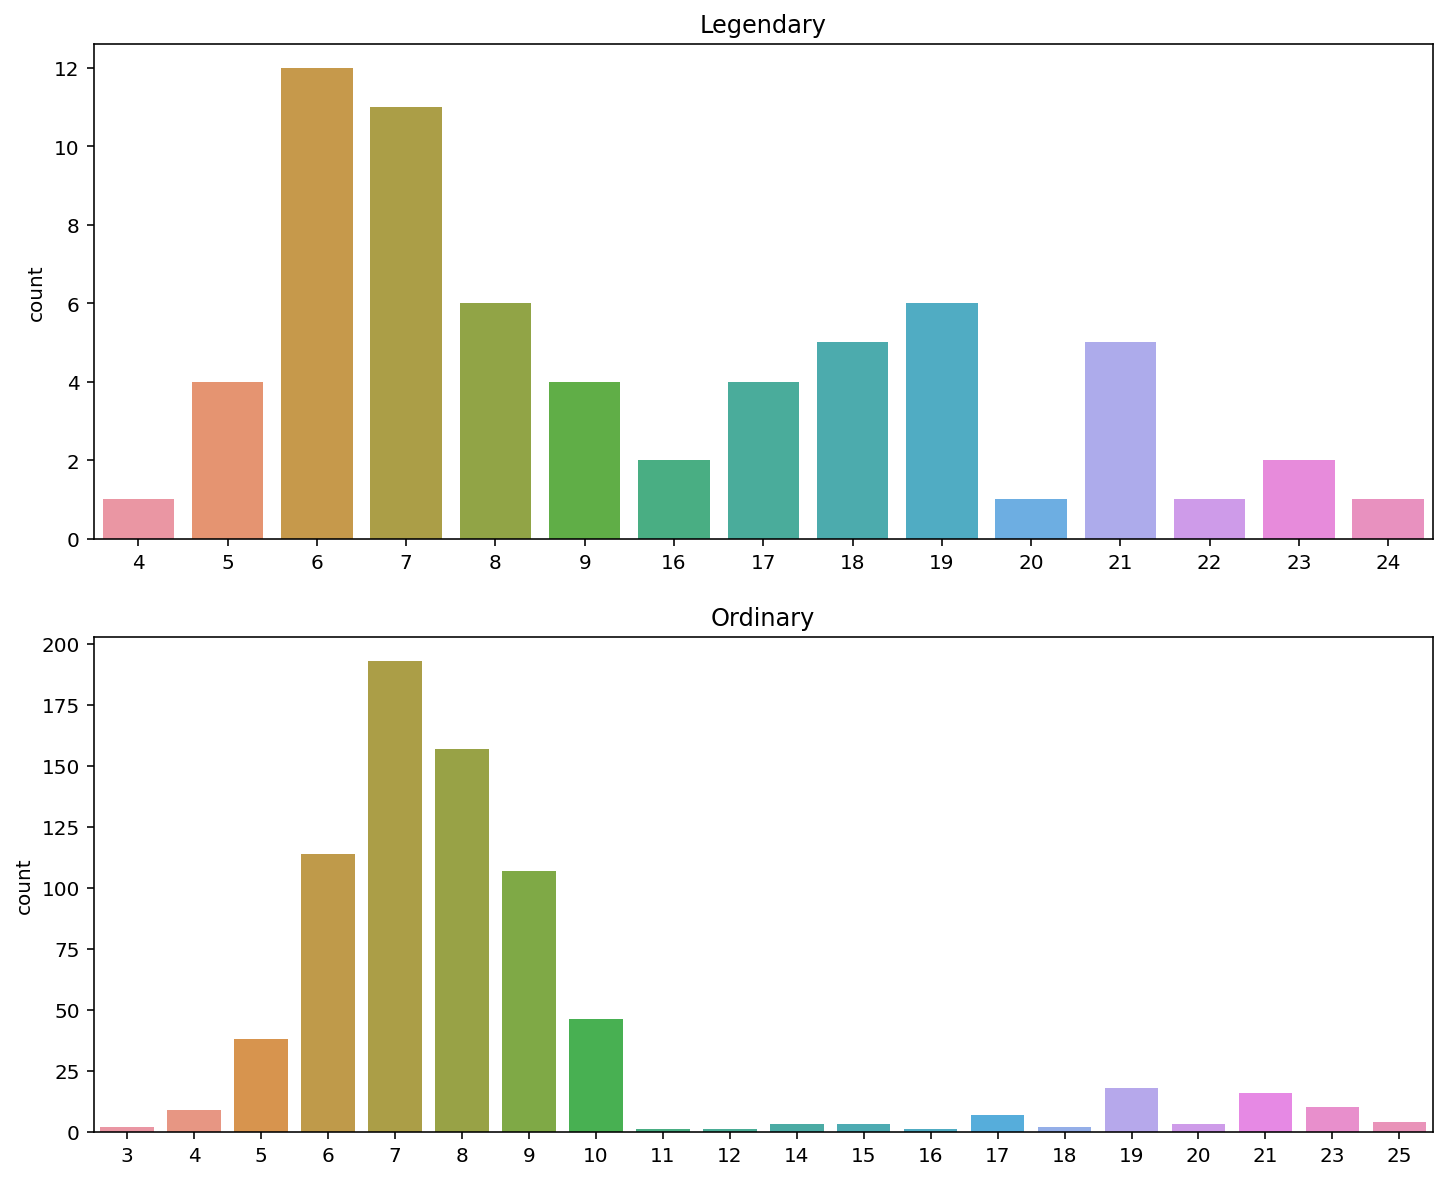

In [79]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

### 전설의 포켓몬은 16자 이상의 긴 이름을 가진 포켓몬이 많다.
### 일반 포켓몬은 10이상의 길이를 가지는 이름의 빈도가 아주 낮다.

In [80]:
# 전설의 포켓몬의 이름이 10이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [81]:
# 일반 포켓몬의 이름이 10이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


### 전설의 포켓몬의 이름이 10이상일 확률은 41%
### 일반 포켓몬의 이름이 10이상일 확률은 16%
## 아주 큰 차이 이므로 legendary인지 아닌지 구분하는데 큰 의미가 있다.
* **만약"Latios"가 전설의 포켓몬이라면 "%%%Latios"또한 전설의 포켓몬이다!**
* **적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!**
* **전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!**

## 데이터 전처리하기
-----

### 머신러닝 수행 전 데이터를 모델에 입력할 수 있게 변환하는 것이 중요

### 머신러닝 모델은 문자열 데이터를 처리할 수 없다.
### -> 적절한 숫자 데이터 or Bool데이터 등으로 전처리 필요 

<br>

### 전설의 포켓몬학습 위한  전처리에서 중점
**1. 이름의 길이 :** ```name_count```컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼 생성   
**2. 토큰추출 :** ```legendary``` 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩으로 처리

## (1) 이름의 길이가 10이상 인가 아닌가
-----

이름의 길이 확인하는 ```name_count```컬럼을 ```pokemon``` DataFrame에 생성

In [82]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


이름의 길이가 10이상이면 True, 미만이면 False를 가지는 ```long_name```컬럼을 생성함

In [85]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


### 전설의 포켓몬 분류하는 작업에 ```name_count```가 유리할지 ```long_name```이 유리할지는 아직 모름
### 모델학습에 두 가지 다 써보자

## 이름에 자주 쓰이는 토큰 추출
-----

### 포켓몬의 이름을 분류하는 기준
1. 한 개 단어 ```Venusaur```
2. 두 개 단어이고 앞 단어는 두 개의 대문자를 가지며, 대문자를 기준으로 두 부분으로 나눔
   ```VenusaurMega Venusaur```
3. 이름은 두 단어이고, 맨 뒤에 X,Y로 성별 표시
   ```CharizardMega Charizard X```
4. 알파벳이 아닌 문자 포함
   ```Zygarde50% Forme```

## 이름에 알파벳 아닌 문자 들어간 경우 전처리
-----

[Pandas.DataFrame.isalpha()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isalpha.html)
### 이름에 띄어쓰기가 있어도 ```isalpha() = False```로 처리된다. 

In [86]:
# 띄어쓰기가 없는 컬럼을 따로 만들기
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ",""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [87]:
# isalpha()로 알파벳으로만 이루어져있는지 검사
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [89]:
# 알파벳 아닌문자가 이름에 포함된 것들
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


### 9개 뿐이니 직접 이름을 바꿔주자

In [90]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

In [91]:
pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


### ```isalpha``` 로 확인 

In [94]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


## 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화 하기
-----

### 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing) 할 수 있다.

### "CharizardMega Charizard X" 를 쪼개서 리스트로 만들기

In [95]:
import re
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [96]:
temp = name_split[0]
temp

'CharizardMega'

In [97]:
tokens = re.findall('[A-z][a-z]*', temp)
tokens

['Charizard', 'Mega']

[re 문서](https://wikidocs.net/4308)

In [108]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [109]:
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-z][a-z]*', part_name)
        tokens.extend(a)
    
    return np.array(tokens)

In [107]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [106]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

66
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'oh', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian',

[```counter```의 설명](https://github.com/sinramyeon/ME-TIL/blob/master/Python/collections.md#counter)

In [110]:
from collections import Counter

In [111]:
a = [1,1,0,0,0,1,1,2,3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [112]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

```most_common``` : 함수에 인자로 숫자를 넣으면 원하는 개수만큼 출력 

In [114]:
most_common= Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

전설의 포켓몬 전체 65마리 중 
* ```Forme```가 15번
* ```Mega```도 6번

### ```str.contains``` 함수로 문자열 데이터셋에 특정 구문 포함되어 있는지 판별

In [116]:
for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)
    
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


## 범주형 데이터 전처리
-----
### 규칙
* 18가지 모든 Type을 모두 원-핫 인코딩(One-Hot Encoding)
* 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 함.

In [117]:
print(types)

['Ground', 'Dark', 'Ice', 'Flying', 'Water', 'Electric', 'Bug', 'Fairy', 'Ghost', 'Poison', 'Psychic', 'Rock', 'Steel', 'Dragon', 'Fighting', 'Fire', 'Grass', 'Normal']


In [118]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ground,Dark,Ice,Flying,Water,Electric,Bug,Fairy,Ghost,Poison,Psychic,Rock,Steel,Dragon,Fighting,Fire,Grass,Normal
0,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## 기본 데이터로 Baseline 만들기
-----

### Baseline 모델
* 가장 기초적인 방법으로 만든 모델
* 성능하한선

In [119]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [120]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [121]:
features = {'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation' }

In [122]:
target = 'Legendary'

In [123]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Generation,Attack,Defense,Total,HP,Sp. Atk,Sp. Def,Speed
0,1,49,49,318,45,65,65,45
1,1,62,63,405,60,80,80,60
2,1,82,83,525,80,100,100,80
3,1,100,123,625,80,122,120,80
4,1,52,43,309,39,60,50,65


In [124]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 데이터 준비의 마지막 단계: 학습데이터와 테스트 데이터 분리

### ```sklearn.model_selection.train_test_split```사용하여 분리 

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 학습데이터에 640개의 데이터, 테스트 데이터에 160개의 데이터 삽입

## 의사결정 트리(decision tree)모델 학습
-----

### ```DecisionTreeClassifier``` 모듈 사용

In [129]:
from sklearn.tree import DecisionTreeClassifier
print("슝=3")

슝=3


### 모델준비

In [131]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

### 모델을 훈련데이터로 학습시키고 예측하기

In [132]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


### 결과 확인 하기

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[143,   4],
       [  5,   8]], dtype=int64)

1. 위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.   
   * TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
   * FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
   * FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
   * TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

<br>

2. 우리 데이터에서 Positive는 ```Legendary=True```, Negative는 ```Legendary=False```

3. Confusion Matrix 해석 방법
https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [137]:
accuracy = round(151 / 160, 2)
print(accuracy)

0.94


### 정확도가 높아보이지만 함정이 있다.

In [134]:
len(legendary)

65

800마리 중에 735마리가 일반 포켓몬이므로 아무 학습 없이도 735마리의 일반 포켓몬은 맞출 수 있다. = 92%의 정답률

### 그러므로 이 데이터 셋은 정확도로 모델 성능 평가 불가

### ```classification_report```를 활용하여 다른 값 확인

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       147
        True       0.67      0.62      0.64        13

    accuracy                           0.94       160
   macro avg       0.82      0.79      0.80       160
weighted avg       0.94      0.94      0.94       160



```recall``` 값 0.62 -> 꽤나 낮다   
$
Recall= 
TP/FN+TP
​
$

### 이번처럼 불균형 데이터에서는 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요.

In [139]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ground', 'Dark', 'Ice', 'Flying', 'Water', 'Electric', 'Bug', 'Fairy',
       'Ghost', 'Poison', 'Psychic', 'Rock', 'Steel', 'Dragon', 'Fighting',
       'Fire', 'Grass', 'Normal'],
      dtype='object')


In [140]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [141]:
target = "Legendary"
target

'Legendary'

In [142]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [143]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


## 의사결정 트리 재학습 
-----

In [145]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [146]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [147]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]], dtype=int64)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### ```recall``` 값이 대폭 상승!